# Milestone 1 Phase 0
**Name : Luthfi Fadhlillah** <br>
**Batch : FTDS 009**

## Import Library

In [18]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly

%matplotlib inline

## Data Loading

In [19]:
data = pd.read_csv('supermarket_sales_Dataclean.csv')

In [20]:
data.head(3)

,Invoice ID,Branch,City,Customer Type,Gender,Product Category,Unit Price,Quantity,Total,Date,Hour,Payment,COGS,GMP,Gross Income,Rating,Hour Range
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13,Ewallet,522.83,4.761905,26.1415,9.1,12 ~ 14
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10,Cash,76.40,4.761905,3.8200,9.6,9 ~ 11
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,13,Credit card,324.31,4.761905,16.2155,7.4,12 ~ 14


## Data Visualization

### 1. Percentage of Sales from Different Cities
In this case, I want to know the comparison of the number of sales transactions from the three cities.

In [21]:
data['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

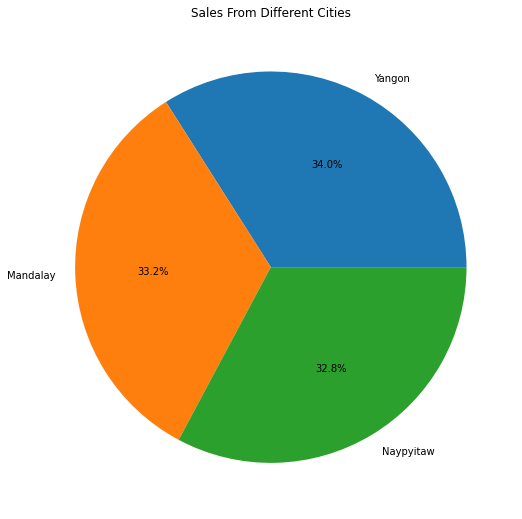

In [22]:
plt.figure(figsize = (16,9))
City = data.City.value_counts().reset_index()
plt.pie(City.City, labels = City['index'],autopct='%1.1f%%')
plt.title("Sales From Different Cities")
plt.show()

A branch is generating most number of sales is Yangon. The least is generated by Naypyitaw branch.

The use of Pie Chart aims to make it easier to see which city dominates in percentage terms.

### 2. Type of Customer
Based on the Customer Type column, I want to know how many are registered as members and how many are not.

In [23]:
data['Customer Type'].unique()

array(['Member', 'Normal'], dtype=object)

In [24]:
data.groupby(['Customer Type']).agg({'Total': 'sum'})

,Total
Customer Type,
Member,164223.444
Normal,158743.305


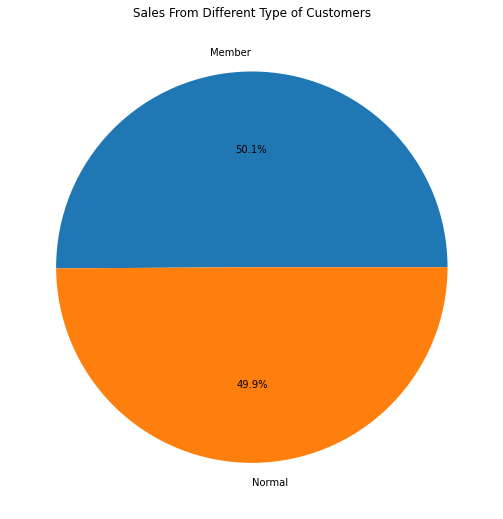

In [25]:
plt.figure(figsize = (16,9))
Customer = data['Customer Type'].value_counts().reset_index()
plt.pie(Customer['Customer Type'], labels = Customer['index'],autopct='%1.1f%%')
plt.title("Sales From Different Type of Customers")
plt.show()

In percentage, the number of members is more than normal customers

### 3. Gender
We can also find out the comparison between male customers and female customers using the gender column.

In [26]:
data['Gender'].unique()	

array(['Female', 'Male'], dtype=object)

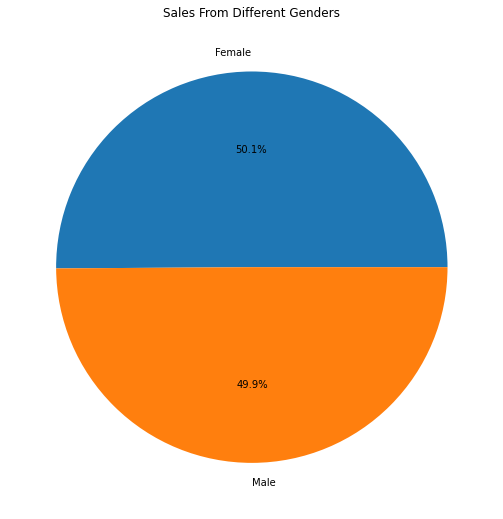

In [27]:
plt.figure(figsize = (16,9))
Gender = data.Gender.value_counts().reset_index()
plt.pie(Gender.Gender, labels = Gender['index'],autopct='%1.1f%%')
plt.title("Sales From Different Genders")
plt.show()

In fact, men and women are almost equal, even though the current stigma says that women prefer shopping than men.

### 4. The most products people buy

In [28]:
data['Product Category'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

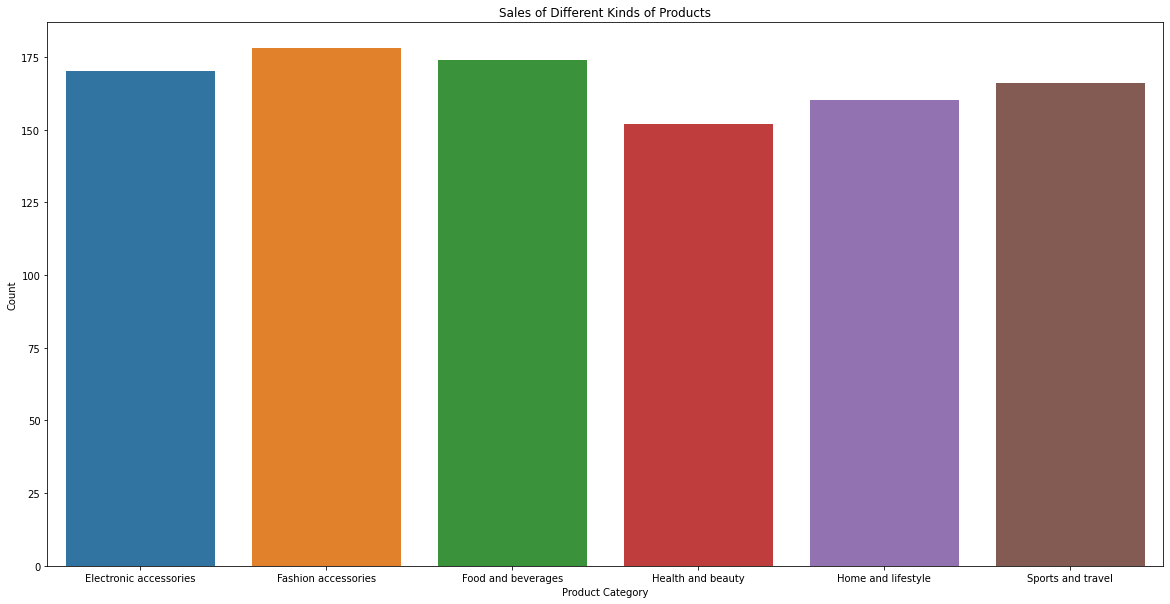

In [29]:
plt.figure(figsize = (20,10))

Product = data.groupby('Product Category').size().to_frame(name = "count").reset_index()
sns.barplot(y = 'count', x='Product Category', data = Product )

plt.title("Sales of Different Kinds of Products")
plt.xlabel("Product Category")
plt.ylabel("Count")

plt.show()

Fashion accessories are the most purchased products, while Health & Beauty is the lowest in terms of sales.

### 5. See the total COGS (Cost of goods sold) value in 3 months

In [30]:
data.head(2)

,Invoice ID,Branch,City,Customer Type,Gender,Product Category,Unit Price,Quantity,Total,Date,Hour,Payment,COGS,GMP,Gross Income,Rating,Hour Range
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,13,Ewallet,522.83,4.761905,26.1415,9.1,12 ~ 14
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,10,Cash,76.40,4.761905,3.8200,9.6,9 ~ 11


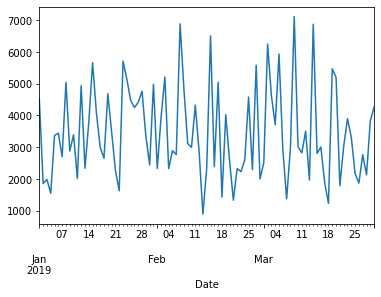

In [31]:
data['Date'] = data['Date'].astype('datetime64[ns]')

sorted_data = data.sort_values(by='Date',ascending=True).groupby('Date').sum()

fig, axes = plt.subplots()
sorted_data = sorted_data['COGS'].plot(kind='line',ax=axes)

There were fluctuations for the COGS value in the period January 2019 to March 2019. In the middle of the month there was always a decrease which would then increase at the end of the month.

### 6. Knowing the types of payments made by gender

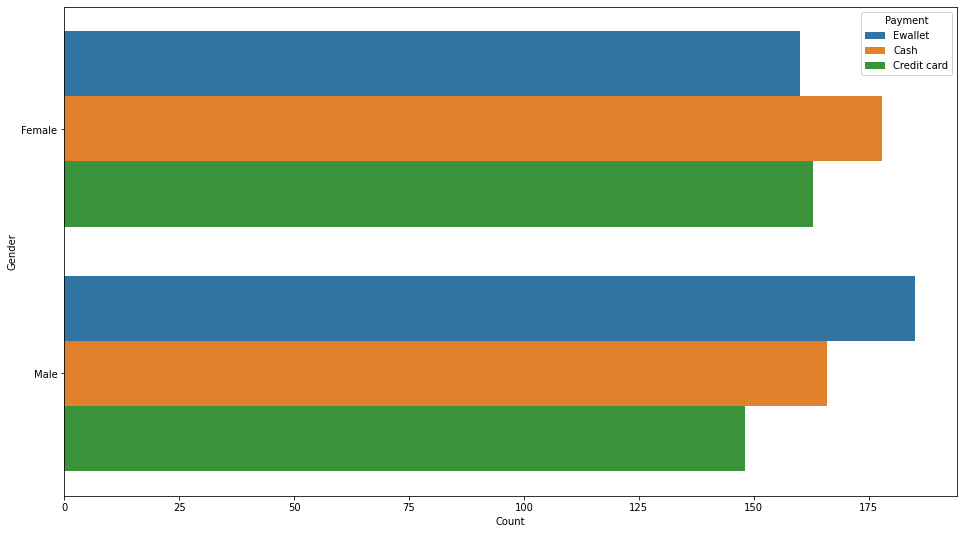

In [32]:
plt.figure(figsize = (16,9))
sns.countplot(y ='Gender', hue = "Payment", data = data) 
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

The data shows that female customers prefer to use the cash payment method, while male customers prefer to use e-wallet.

### Ratings of the branches

Text(0.5, 1.0, 'Ratings by Branch')

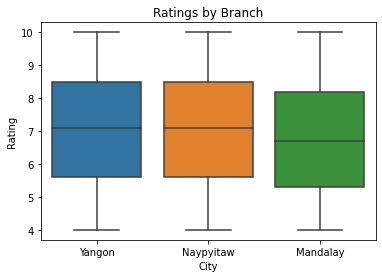

In [33]:

sns.boxplot(x="City", y ="Rating" ,data = data).set_title("Ratings by Branch")

Branch Mandalay has the lowest rating among all the branches